In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import os
%matplotlib inline

In [3]:
file = pd.read_csv(r"D:\ASHSIH\ENGG\COURSES\MachineLearning\MeanTemp.csv")
file.head()

,YEAR,ANNUAL,AUTUMN,SUMMER,MONSOON,WINTER
0,1901,24.23,18.71,26.06,27.30,21.92
1,1902,24.33,19.70,26.44,27.18,21.49
2,1903,23.80,19.05,25.47,27.17,21.27
3,1904,23.86,18.66,25.84,26.83,21.42
4,1905,23.71,17.58,24.99,27.37,21.48


In [5]:
columns = file[['AUTUMN','SUMMER','MONSOON','WINTER','ANNUAL']]
columns.head(108)

,AUTUMN,SUMMER,MONSOON,WINTER,ANNUAL
0,18.71,26.06,27.30,21.92,24.23
1,19.70,26.44,27.18,21.49,24.33
2,19.05,25.47,27.17,21.27,23.80
3,18.66,25.84,26.83,21.42,23.86
4,17.58,24.99,27.37,21.48,23.71
...,...,...,...,...,...
103,19.93,27.06,27.33,22.24,24.74
104,19.79,26.33,27.64,21.93,24.58
105,21.33,26.52,27.40,22.66,25.06
106,20.10,26.69,27.49,22.32,24.77


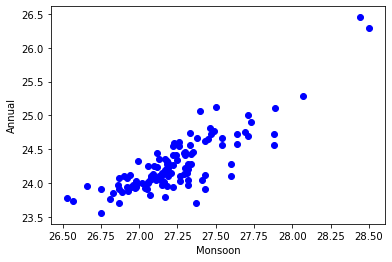

In [6]:
plt.scatter(columns.MONSOON,columns.ANNUAL,  color='blue')
plt.xlabel("Monsoon")
plt.ylabel("Annual")
plt.show()

In [13]:
msk = np.random.rand(len(file)) < 1.0
train = columns[msk]

file1 = pd.read_csv(r"D:\ASHSIH\ENGG\COURSES\MachineLearning\MeanTemp1.csv")
file1.head(8)
columns1 = file1[['AUTUMN','SUMMER','MONSOON','WINTER','ANNUAL']]
columns1.head(108)
msk1 = np.random.rand(len(file1)) < 1.0
test = columns1[msk1]


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AUTUMN','SUMMER','MONSOON','WINTER']])
y = np.asanyarray(train[['ANNUAL']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.16998255 0.2487016  0.3035734  0.26549705]]


In [16]:
y_hat= regr.predict(test[['AUTUMN','SUMMER','MONSOON','WINTER']])
print('predictions:',y_hat)
x = np.asanyarray(test[['AUTUMN','SUMMER','MONSOON','WINTER']])
y = np.asanyarray(test[['ANNUAL']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

predictions: [[25.1305279 ]
 [24.7126683 ]
 [24.82486442]
 [24.91950035]
 [24.67994958]
 [25.05007989]
 [26.4759059 ]
 [26.26417195]]
Residual sum of squares: 0.01
Variance score: 0.99


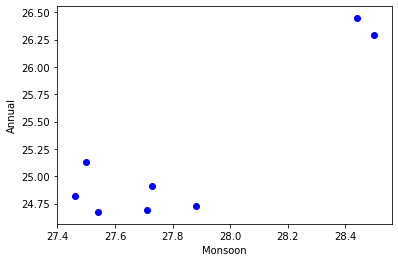

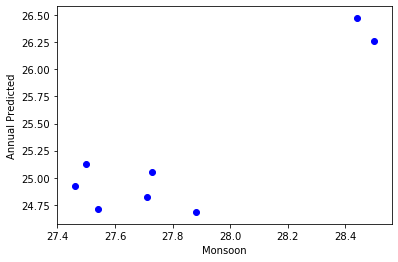

In [17]:
plt.scatter(columns1.MONSOON,columns1.ANNUAL,  color='blue')
plt.xlabel("Monsoon")
plt.ylabel("Annual")
plt.show()

plt.scatter(columns1.MONSOON,y_hat,color='blue')
plt.xlabel("Monsoon")
plt.ylabel("Annual Predicted")
plt.show()